# Ford GoBike System Data 
## by Truc Phan

## Table of contents

1. [Introduction](#intro)
2. [Gather and Assess Data](#gather&assess)
3. [Clean Data](#clean)
4. [Univariate Exploration](#univar)
5. [Bivariate Exploration](#bivar)
6. [Multivariate Exploration](#multivar)

<a id = "intro"></a>
## Preliminary Wrangling

Ford GoBike (now known as Bay Wheels) is the first regional and large-scale bicycle sharing system deployed in California's San Francisco Bay Area. The system was originally launched as Bay Area Bike Share in August 2013 and consisted of only 700 bicycles with 70 stations, 34 of which were in San Francisco. In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. As of January 2018, the Ford GoBike system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose with about 10,000 annual subscribers.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

The dataset used for this exploratory analysis includes information about 180,000+ individual rides made in a bike-sharing system in February 2019 covering the greater San Francisco Bay area, also available in other periods [here](https://www.lyft.com/bikes/bay-wheels/system-data) and [here](https://s3.amazonaws.com/baywheels-data/index.html).

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id = "gather&assess"></a>
## Gathering and Assessing Data

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# high-level overview of data shape and types
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [9]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [11]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### Quality issues:
So far I have spotted the following quality issues which will be fixed in the next Cleaning data part.
- Erroneous datatypes:
    - ID fields should be objects, not floats or int
    - Timestamp fields should be datetimes, not objects
    - member_birth_year should be integer
    - user_type and member_gener should be categories
- Need new variables:
    - Duration should be in minutes or hours
    - Start/end date and start/end hour, etc., should be added to for further analysis
    - Rider age should be calculated from member_birth_year
- Missing data in station id variables and member information columns
 

<a id = "clean"></a>
## Cleaning Data

In [12]:
# Make a copy of df
df_clean = df.copy()

In [13]:
# Issue 1:
# Convert id fields to objects, timestamp fields to datetimes, user_type and member_gener to categories
df_clean = df_clean.astype({'start_station_id': 'object', 'end_station_id': 'object', 'bike_id': 'object', 
                                        'start_time':'datetime64[ns, UTC]', 'end_time':'datetime64[ns, UTC]',
                                         'user_type': 'category', 'member_gender':'category'})

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   duration_sec             183412 non-null  int64              
 1   start_time               183412 non-null  datetime64[ns, UTC]
 2   end_time                 183412 non-null  datetime64[ns, UTC]
 3   start_station_id         183215 non-null  object             
 4   start_station_name       183215 non-null  object             
 5   start_station_latitude   183412 non-null  float64            
 6   start_station_longitude  183412 non-null  float64            
 7   end_station_id           183215 non-null  object             
 8   end_station_name         183215 non-null  object             
 9   end_station_latitude     183412 non-null  float64            
 10  end_station_longitude    183412 non-null  float64            
 11  bike_id      

In [19]:
# Issue 2: add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, 
                            # trip start hour of the day, day of week and month
df_clean['duration_mins'] = df.duration_sec/60

df_clean['start_year'] = df_clean.start_time.dt.strftime('%Y')
df_clean['start_hourofday'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_dayofweek'] = df_clean.start_time.dt.strftime('%a')

df_clean = df_clean.astype({'start_year':'int64'})

In [16]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,start_year,start_hourofday,start_dayofweek
0,52185,2019-02-28 17:32:10.145000+00:00,2019-03-01 08:01:55.975000+00:00,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,2019,17,Thu
1,42521,2019-02-28 18:53:21.789000+00:00,2019-03-01 06:42:03.056000+00:00,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,2019,18,Thu
2,61854,2019-02-28 12:13:13.218000+00:00,2019-03-01 05:24:08.146000+00:00,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,2019,12,Thu
3,36490,2019-02-28 17:54:26.010000+00:00,2019-03-01 04:02:36.842000+00:00,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,2019,17,Thu
4,1585,2019-02-28 23:54:18.549000+00:00,2019-03-01 00:20:44.074000+00:00,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,2019,23,Thu


In [20]:
# Issue 2 (cont.): add a new column calculating riders' age from 'member_birth_year'
df_clean['member_age'] = df_clean['start_year'] - df_clean['member_birth_year']
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_mins,start_year,member_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.0,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,12.101307,2019.0,34.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,29.906496,0.0,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,2019.0,18.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,5.416667,2019.0,27.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,8.566667,2019.0,32.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,13.266667,2019.0,39.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1424.066667,2019.0,141.000000


In [21]:
# Issue 3: drop rows with missing station ids and missing member age
df_clean.drop(df_clean[df_clean.start_station_id.isnull()].index, inplace=True)
df_clean.drop(df_clean[df_clean.member_age.isnull()].index, inplace=True)

In [22]:
# Issue 4: convert dtypes of new columns
df_clean = df_clean.astype({'member_birth_year':'int64', 'member_age':'int64', 
                            'start_hourofday': 'int64','start_dayofweek': 'category'})

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   duration_sec             174952 non-null  int64              
 1   start_time               174952 non-null  datetime64[ns, UTC]
 2   end_time                 174952 non-null  datetime64[ns, UTC]
 3   start_station_id         174952 non-null  object             
 4   start_station_name       174952 non-null  object             
 5   start_station_latitude   174952 non-null  float64            
 6   start_station_longitude  174952 non-null  float64            
 7   end_station_id           174952 non-null  object             
 8   end_station_name         174952 non-null  object             
 9   end_station_latitude     174952 non-null  float64            
 10  end_station_longitude    174952 non-null  float64            
 11  bike_id      

### What is the structure of your dataset?

The unclean dataset has 180,000+ bike trip records with 16 variables collected in February 2019 in the San Francisco Bay Area. The variables can be divided into three major categories:
- trip duration: `duration_sec`, `start_time`, `end_time`

- station info: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`

- anonymized customer data: `bike_id`, `user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip`

After the data wrangling process, the dataset was assessed, cleaned as well as enhanced with features/variables that may assisst further exploration and analysis:
- rental info: `duration_minute`, `start_date`, `start_hourofday`, `start_dayofweek`

- customer info: `member_age`


### What is/are the main feature(s) of interest in your dataset?

I am most interested in exploring the average trip duration and the rental occurrence patterns. In addition, I want to know how these two features relate to a user's type, gender, and age to understand how and what riders use the bike-sharing service. Finally, graphically speaking, I am also keen on figuring out which stations have the most bikes taken.

Sample questions to answer: 
- When are most trips taken in terms of time of day, day of the week, or month of the year? 
- How long does the average trip take? 
- Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Firstly, to find out how long the average trip takes, I need the trips' duration information. Secondly, the start date/time features will help support my investigation of which time of the day and which day of the week that bikes are most rented. Thirdly, the member information (i.e., user type, gender, and age) will help determine whether different groups of riders have unique bike usage patterns and which rider groups Ford GoBike (or Bay Wheels now) should target as the primary customer groups. Lastly, I will look at the start station IDs and names to analyze the top stations with the busiest bike rentals, which will help the company with its bike arrangement management.

<a id = "univar"></a>
## Univariate Exploration

#### 1. Trip duration distribution
First let's start with distribution of trip duration.

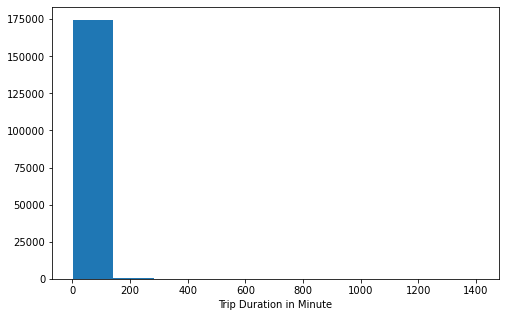

In [24]:
# Setup graphic color and grid style
plt.rcParams['figure.figsize'] = 8, 5
base_color = sb.color_palette('colorblind')[0]

# Plot trip duration distribution
plt.hist(data=df_clean, x='duration_mins');
plt.xlabel('Trip Duration in Minute');

The duration distribution is extremely right-skewed. From the the figure above, it can be seen that the majority of the trips were less than 200 mins and the right skewness indicates an outlier of a long rental time (almost 24 hours). Next steps will be zooming in the part of the distribution where most cases are and then remove outliers out of the dataset.

In [25]:
df_clean.duration_mins.describe(percentiles=[.99])

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
50%           8.500000
99%          52.933333
max        1409.133333
Name: duration_mins, dtype: float64

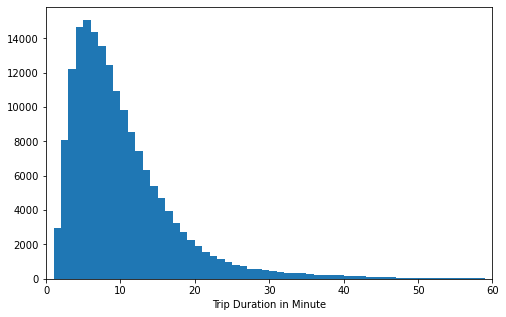

In [26]:
bins = np.arange(0, 60, 1)
plt.hist(data=df_clean, x='duration_mins', bins=bins);
plt.xlim([0,60]);
plt.xlabel('Trip Duration in Minute');

99% of the trips were less than 1 hour long, with most of them falling between 5 to 10 minutes. Therefore, for the sake of this project, I will remove the outlier long trips to focus on the most common records to explore the pattern.

In [27]:
# issue 5: filter out outlier trip records where the duration was very long, keeping the ones with <= 60'
df_clean = df_clean.query('duration_mins <= 60')
df_clean.shape

(173566, 21)

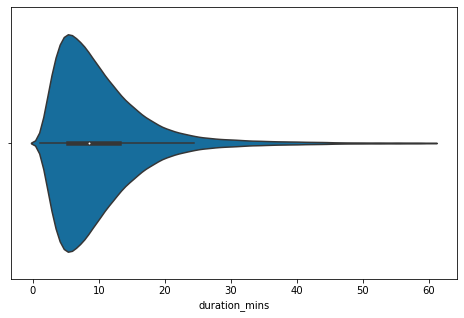

In [28]:
sb.violinplot(data = df_clean, x='duration_mins',  color = base_color);

The violin plot above confirms that most bike trip had short durations, with less than 20 minutes.

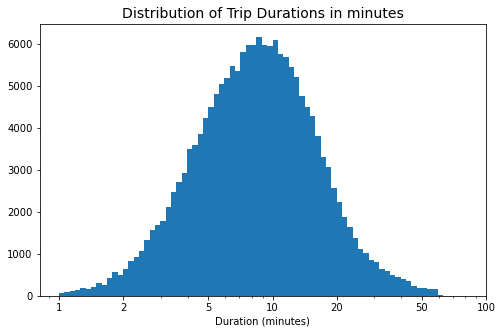

In [31]:
# There's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_mins'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_clean, x = 'duration_mins', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xlabel('Duration (minutes)');
plt.title('Distribution of Trip Durations in minutes', fontsize=14);

Duration (min) has a long-tailed distribution, with a lot of trips on the short duration end, and few on the long duration end. When plotted on a log-scale, the duration distribution looks like a normal distribution, with a peak between 5 and 20 minutes.

#### 2. Trip distributions over hour-of-day and day-of-week
I'll now move on to the other trip related variables in the dataset: start hour-of-day and start day-of-week.

In [32]:
# Issue 6: cast 'start_dayofweek' to ordinal category dtype
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_cat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_clean['start_dayofweek'] = df_clean['start_dayofweek'].astype(weekday_cat)

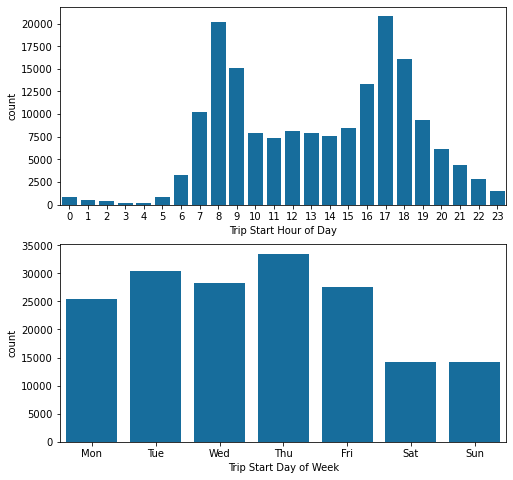

In [33]:
# let's plot these two together to get an idea of each category variable's distribution.
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

sb.countplot(data = df_clean, x = 'start_hourofday', color = base_color, ax = ax[0])
sb.countplot(data = df_clean, x = 'start_dayofweek', color = base_color, ax = ax[1])

ax[0].set(xlabel="Trip Start Hour of Day")
ax[1].set(xlabel="Trip Start Day of Week")

plt.show()

The trip distribution over day hours indicates two peak timeslots corresponding to typical rush hours: around 8:00 - 9:00 AM and 5:00 - 6:00 PM. According to the trip distribution over the day of week plot, it is evident that most bike trips happened on workdays (Monday-Friday). From all of the charts so far, we can conlude that the primary bike usage is probably for short commuting within cities. 

#### 3. Plot member related data
The following plots are around members/users to see what makes up the riders.


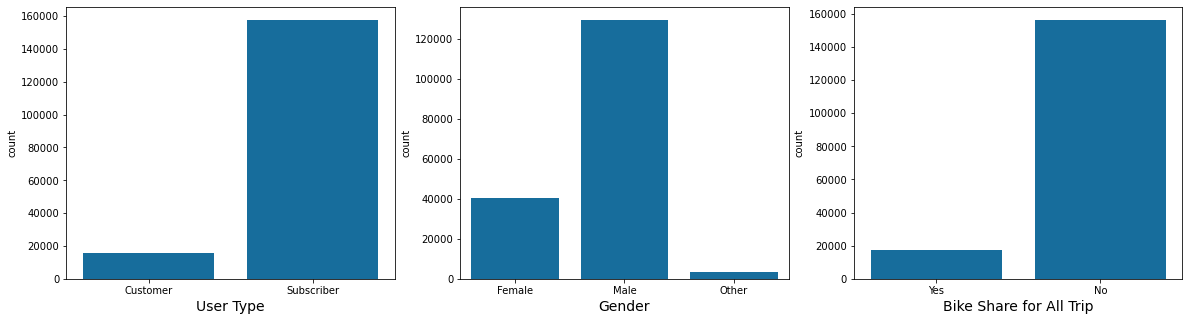

In [34]:
# let's plot all user_type, member_gender and bike_share_for_all_trip together
# to get an idea of each category variable's distribution

fig, ax = plt.subplots(ncols=3, figsize = [20,5])

sb.countplot(data = df_clean, x = 'user_type', color = base_color, ax = ax[0])
sb.countplot(data = df_clean, x = 'member_gender', color = base_color, ax = ax[1])
sb.countplot(data = df_clean, x = 'bike_share_for_all_trip', color = base_color, ax = ax[2])

ax[0].set_xlabel("User Type",fontsize=14)
ax[1].set_xlabel("Gender", fontsize=14)
ax[2].set_xlabel("Bike Share for All Trip",fontsize=14)

plt.show()

Most bike users were male subscribers and did not use bike share for all trips. 

#### Let's look at member age now.

In [35]:
df_clean.member_age.describe(percentiles=[.99])

count    173566.000000
mean         34.191610
std          10.116912
min          18.000000
50%          32.000000
99%          64.000000
max         141.000000
Name: member_age, dtype: float64

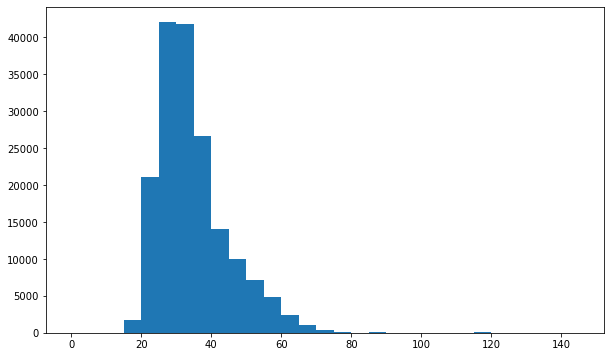

In [36]:
# Plot the distribution of members' age
plt.figure(figsize=[10,6])
bins = np.arange(0, df_clean.member_age.max() + 5, 5)
plt.hist(df_clean.member_age.dropna(), bins= bins);

It also is surprising to see the age distribution spans pretty far to the right, indicating cases where riders are older than 80 years old. Moreover, 99% of the users were 64 years old any younger. It is also very unusual to me that people still bike when they are older than 80, especially at 141 yrs old. Therefore, I will filter out records where member age is more than 70.

In [37]:
# Issue 7: filter out outlier ages from visually examination of the distribution above
df_clean = df_clean.query('member_age <= 70')

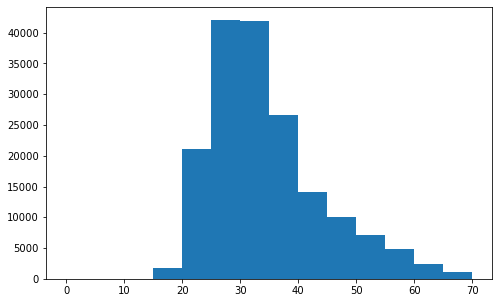

In [38]:
# Plot member age histogram after filtering
bins = np.arange(0, df_clean.member_age.max() + 5, 5)
plt.hist(df_clean.member_age, bins= bins);

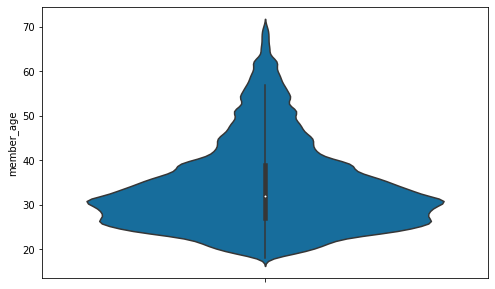

In [39]:
plt.figure(figsize=[8,5])
sb.violinplot(data = df_clean, y = 'member_age', color= base_color);

The data is not distributed evenly. Most members were around 25 to 35 years old, corresponding to the trip distribution plots that most trips were on Mon-Fri and maxed during rush hours of a day. As the age gets older than 40, bike usage dropped significantly. 

#### 4. Plot top 10 stations with the highest number of rented bikes

In [40]:
top_station_name = df_clean.start_station_name.value_counts()[:10].sort_values(ascending= False)

In [41]:
top_station_name

Market St at 10th St                                         3629
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3378
Berry St at 4th St                                           2914
Montgomery St BART Station (Market St at 2nd St)             2690
Powell St BART Station (Market St at 4th St)                 2576
San Francisco Caltrain (Townsend St at 4th St)               2542
San Francisco Ferry Building (Harry Bridges Plaza)           2490
Howard St at Beale St                                        2207
Steuart St at Market St                                      2166
Powell St BART Station (Market St at 5th St)                 2104
Name: start_station_name, dtype: int64

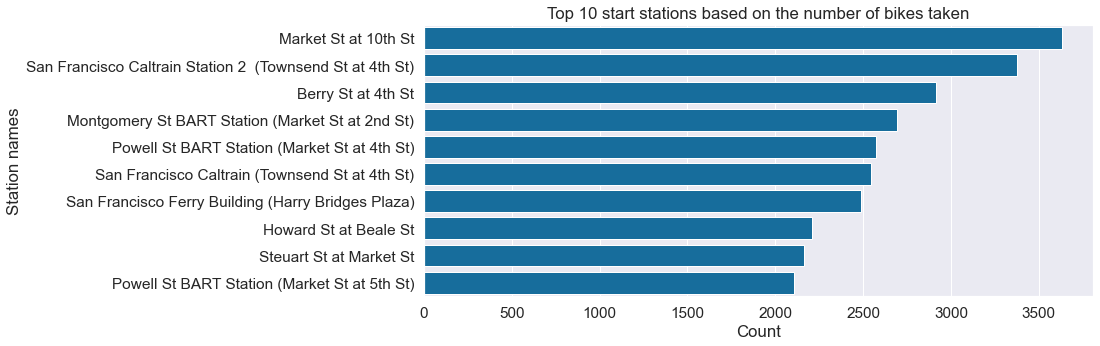

In [42]:
sb.set(rc={'figure.figsize':(12,5)}, font_scale=1.4)
ax = sb.barplot(y=top_station_name.index, x=top_station_name, color= base_color)
ax.set(ylabel='Station names', xlabel='Count', title = 'Top 10 start stations based on the number of bikes taken')
plt.show()

Stations on Market Street and Townsend Street had the highest numbers of bikes taken. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

According to the plotted distributions, interesting insights are as follows.
- The number of trips peaked around 8-9 AM and 5-6 PM during a day, which is typical rush hours.
- There were more trips on workdays (Mon-Fri) compared to weekends.
- Most trips were quick and short, lasting between 5 to 10 minutes, though there were some unusually long outliers like 24 hours.
- User-wise, there were more male riders than females, and most bike users were subscribers compared to casual riders. In addition, the majority of the members did not use bike share for all [option](https://www.lyft.com/bikes/bay-wheels/bike-share-for-all).
- Another unusual point in the dataset relates to member age distribution with some outliers, such as the maximum age of 141. However, most riders were around 25 to 35 years old, and when riders got older than 40, bike usage dropped significantly.
- The top ten stations with the highest number of bike rentals were mainly on Market Street and Townsend Street.

The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked normally distributed, with a mean at around 10 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

As mentioned above, two unusual distributions are of trip duration and member age.

The distribution of the trip duration was a little surprising at first plotting out the original data. I used `.describe() with percentile of 99%` and `xlim()` to zoom in to a smaller range where most trip records fell to make the distribution much clearer. After that, I filtered out the outlier long trip records with `.query()` so that the analysis will focus on the main cases of typical usage.

The member age variable was not normally distributed due to outliers like the max age of 141, which is impossible as the oldest person living person was at the age of 122. Similarly to what I did with trip duration distribution, I used `.describe() with percentile of 99%` to find out the value of age where 99% of riders fell under. I then filtered out the exceptional outliner age values (i.e. > 70) using `.query()` and keep the records that describes most of the dataset.

In [43]:
# save the clean data to a .csv file

df_clean.to_csv('201902_fordgobike_tripdata_clean.csv', encoding= 'utf-8', index=False)

<a id = "bivar"></a>
## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between numerical features in the data.

In [44]:
all_numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 
                    'start_station_longitude', 'end_station_id', 'end_station_latitude',
                    'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age', 'duration_mins']
numeric_vars = ['duration_mins', 'member_age']
categoric_vars = ['start_dayofweek', 'start_hourofday', 'member_gender', 'user_type']

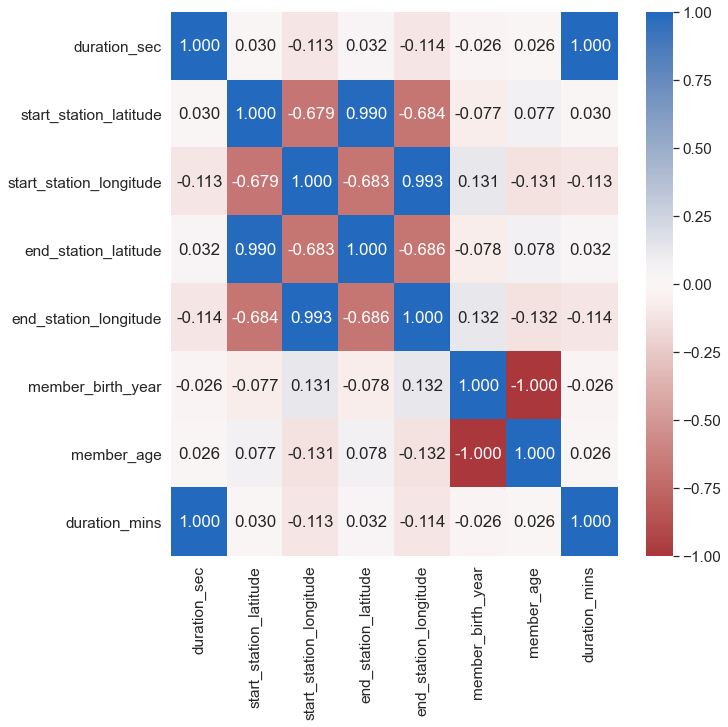

In [45]:
# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(df_clean[all_numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

**Observations from the correlation heatmap:**

- The correlation cofficients indicate there might be positively strong correlations between the following pairs of variables: (start_station_latitude, end_station_latitude), and (start_station_longitude, end_station_longitude). 
- Meanwhile, two pairs of (start_station_latitude, start_station_longitude), and (end_station_latitude, end_station_longitude) are negatively correlated. 
- However, it is not easy to explain those correlations without pinning the station latitudes and longtitudes on a map to see which stations had the most rented bikes. Therefore, I will not look into those relationships under this study.

Next, I will look closer at the relationship between the numeric variables we are most interested in: ``duration_min`` and ``member_age``.

In [46]:
df_clean.reset_index(drop=True, inplace= True)

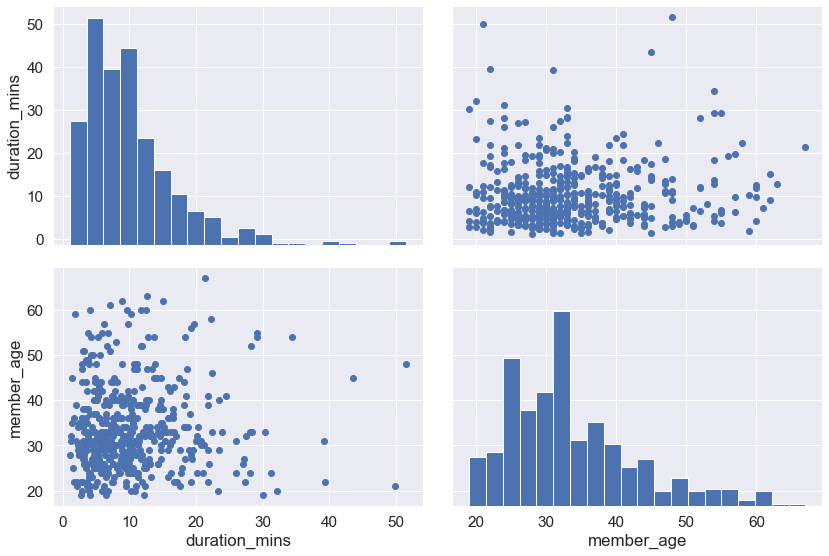

In [47]:
# Plot matrix: sample 500 records so that plots are clearer and they render faster

samples = np.random.choice(df_clean.shape[0], 500, replace = False)
samp = df_clean.loc[samples,:]

g = sb.PairGrid(data = samp, vars = numeric_vars, height = 4, aspect = 1.5)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

**Observations from the matrix plot:**

- There is no specific relationship (like linear) between duration_min and member_age. 
- In both scatter plots, there is a dense area at around (age 30, duration 10 minutes). This confirms the previous observations that the member mean age is of aound 32, and the mean of the trip duration is around 10, while peak is around 5 minutes.

Let's move on to looking at the relationship between numeric features and categorical features.

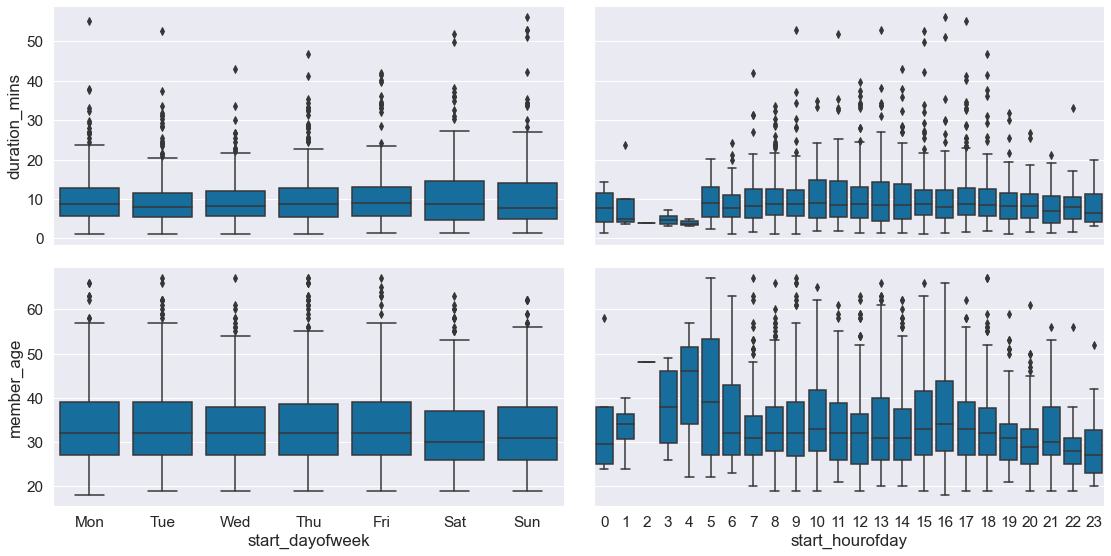

In [56]:
# Plot matrix of numeric features against categorical features: start hour and start day.
# can use a larger sample since there are fewer plots and they're simpler in nature.

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

samples = np.random.choice(df_clean.shape[0], 2000, replace = False);
samp = df_clean.loc[samples, :];

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = base_color);

g = sb.PairGrid(y_vars = ['duration_mins', 'member_age'], x_vars = ['start_dayofweek', 'start_hourofday'], 
                data = samp, height = 4, aspect = 2);
g.map(boxgrid);

**Observations from above plots:**
- In terms of duration, it is interesting to note that bike trips were of the similar length either on weekends (i.e., Saturday and Sunday) or on weekdays (Mon-Fri). I expected that bike trips should have been shorter during weekdays compared to weekends as riders used bikes for quick commuting from Mon-Fri, while on Sat and Sun, the trips would be more relaxing. 
- Bike rides start between 5:00 AM to 6:00 PM have the longest mean durations compared to other time frames.
- Age-wise, the mean age of bikers on weekdays (Mon-Fri) are higher than the mean age of bikers on weekends. The mean age of bikers on Sunday is the lowest.
- The mean age of bikers fluctuates with hours during the day, with peeks at two timeframes between 6:00 AM to 9:00 AM and  3:00 PM to 5:00 PM.

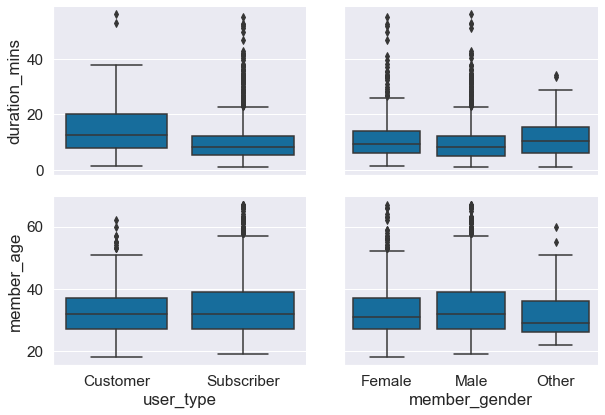

In [58]:
# Plot matrix of numeric features against categorical features: user_type and member_gender.
g = sb.PairGrid(y_vars = ['duration_mins', 'member_age'], x_vars = ['user_type', 'member_gender'], 
                data = samp, height = 3, aspect = 1.5);
g.map(boxgrid);

**Observations from above plots:**

- Casual customers bike longer on average compared to subscribed members.
- Female bikers bike longer on average compared to male bikers.
- The mean age of subscribed members is higher than the mean age of casual customers .
- The mean age of male bikers is higher than the mean age of female bikers.

Finally, let's look at relationships between the four categorical features.

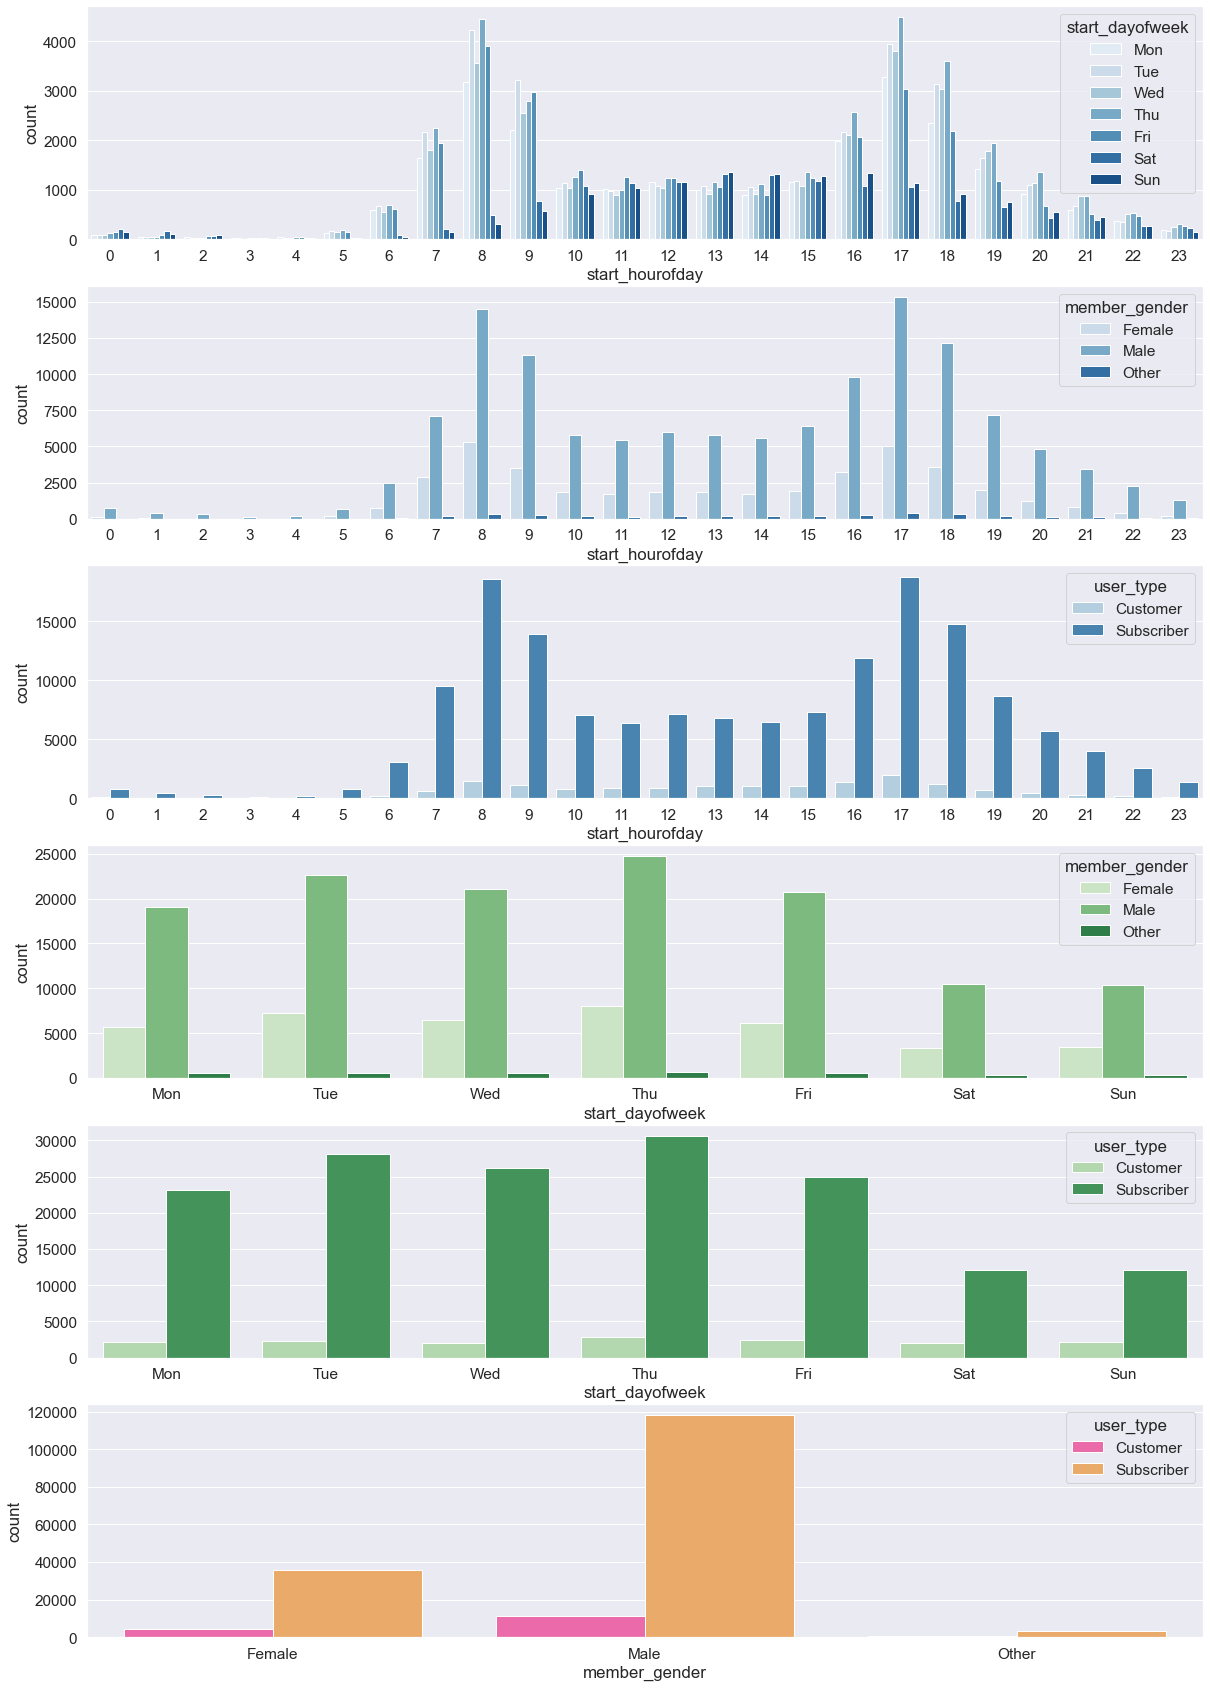

In [59]:
plt.figure(figsize = [20, 30]);

plt.subplot(6, 1, 1);
sb.countplot(data = df_clean, x = 'start_hourofday', hue = 'start_dayofweek', palette = 'Blues');

plt.subplot(6, 1, 2);
sb.countplot(data = df_clean, x = 'start_hourofday', hue = 'member_gender', palette = 'Blues');

plt.subplot(6, 1, 3);
sb.countplot(data = df_clean, x = 'start_hourofday', hue = 'user_type', palette = 'Blues');

plt.subplot(6, 1, 4);
sb.countplot(data = df_clean, x = 'start_dayofweek', hue = 'member_gender', palette = 'Greens');

plt.subplot(6, 1, 5);
sb.countplot(data = df_clean, x = 'start_dayofweek', hue = 'user_type', palette = 'Greens');

plt.subplot(6, 1, 6);
sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type', palette = 'spring');

**Observations from above plots:**
- Thursday 8:00 AM and 5:00 PM have the highest biker counts across 7 days, 24 hours.
- 5:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
- 5:00 PM has the highest numbers of both 'Subscriber' and 'Customer' bikers compared to other hours.
- Thursday has the most male bikers compared to other days. It also has the most female bikers compared to other days.
- Thursday has the most subscribers compared to other days. It has the most casual customers compared to other days.
- Most subscribers are male. Most casual customers are also male.

---

Let's make a plot with Log tranform on duration_min axis.

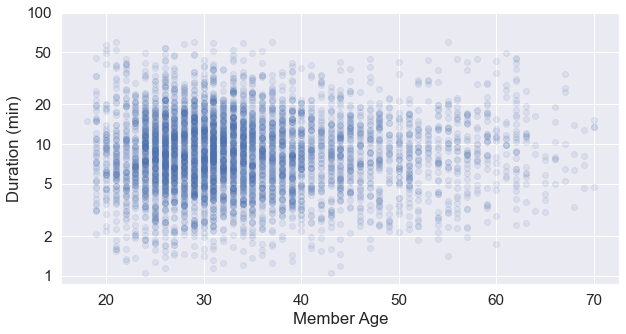

In [60]:
# scatter plot of duration_mins vs. member_age, with log transform on duration_mins axis
samples = np.random.choice(df_clean.shape[0], 5000, replace = False)
samp = df_clean.loc[samples,:]

plt.figure(figsize = [10, 5]);
plt.scatter(data = samp, x = 'member_age', y = 'duration_mins', alpha = 1/10);
plt.xlabel('Member Age');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.ylabel('Duration (min)');

Although we are still not seeing linear relationship between duration_mins and member_age, the data looks distribute more even compared to the scatter plot drawn eariler.

Now, let's take a second look at the log duration and member age distributions on the four categorical variables: start day of the week, start hour of the day', member gender, user type.

In [61]:
# Compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_clean['log_duration_mins'] = df_clean['duration_mins'].apply(log_trans)

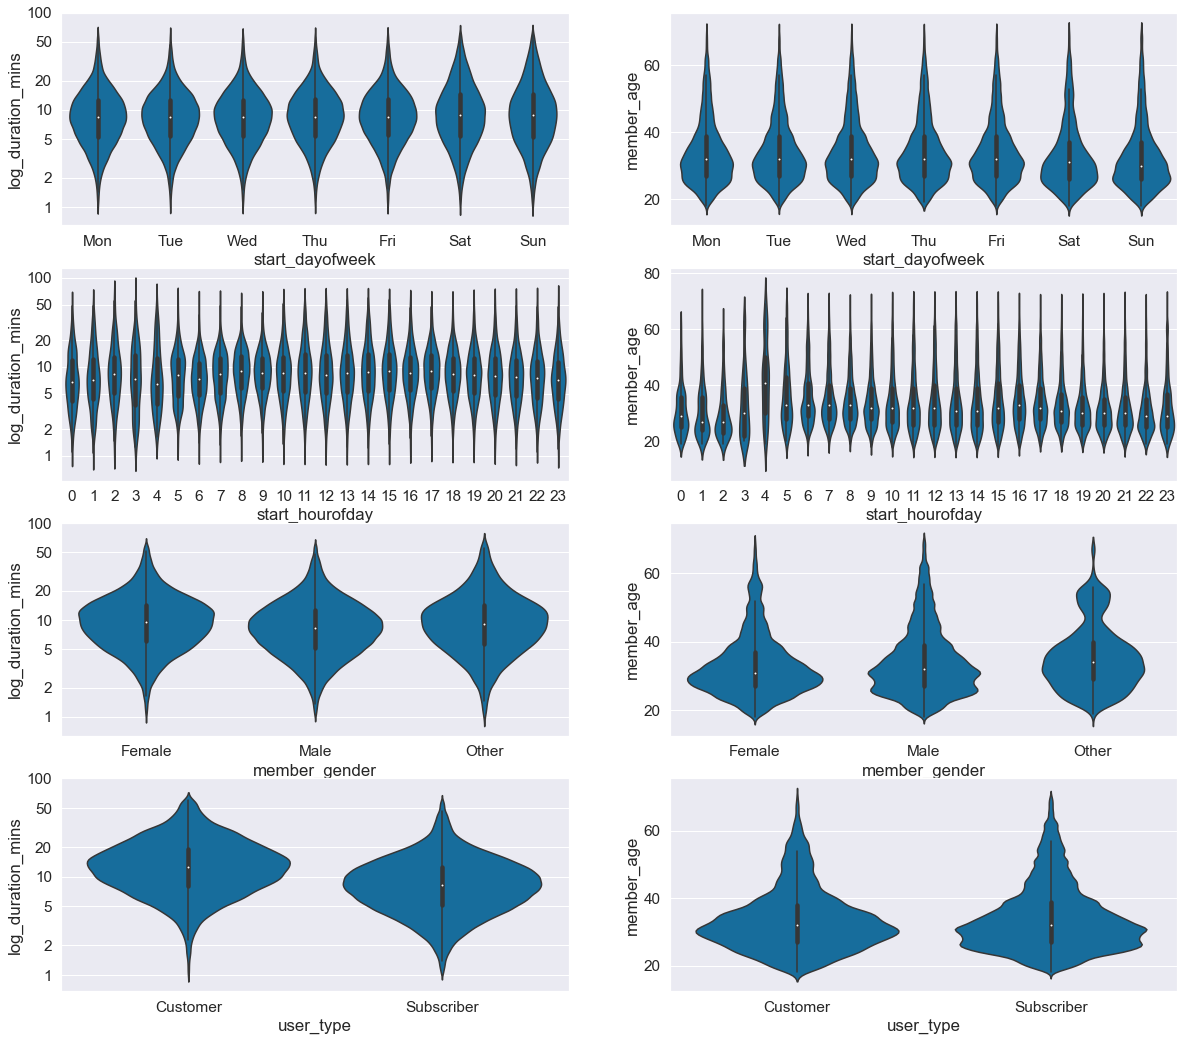

In [62]:
# Plot the categorical variables against duration_mins and member_age again, 
# this time with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [20,18])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df_clean, x = var, y = 'log_duration_mins', ax = ax[i,0], color = base_color);
    ax[i,0].set_yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])));
    ax[i,0].set_yticklabels([1, 2, 5, 10, 20, 50, 100]);
    sb.violinplot(data = df_clean, x = var, y = 'member_age', ax = ax[i,1], color =base_color);

**Observations:**
- The shapes of the violins in the plots on the first column (with log_duration_mins as y-axis) are more even compared to the shapes of the violins in the plots on the column with member_age as y-axis. The transformation makes the violins on the side with the log_duration_mins looks more even.
- Look at the violins plots on the first column with the log_duration_mins as y-axis, we can observe the followings:
    - The plot on 1st row shows that there are more bike rides with durations close to mean duration time (10 minutes) on the weekdays compared to the bike rides on the weekends.
    - The plot on 2nd row shows that the duration mean per hour comes closer to 10 mins for all hours.
    - The plot on 3rd row shows that the mean trip duration of female is longer than the mean duration of male.
    - The plot on 4th row shows the mean bike duration of the casual customers is longer than the mean duration of the subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Firstly, most trips are taken on Thursday, especially at 8:00 AM and 5:00 PM. Secondly, most trips happen during weekdays (Mondy - Firday). It is interesting that trips are of the similar length either on weekends (i.e., Saturday and Sunday) or on weekdays (Mon-Fri). However, under the log transformation of the duration, it shows that there are more trips with shorter durations on weekdays than on the weekends. It is because that most riders use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), while on Sat and Sun, the trips would be more relaxing. Age-wise, the mean age of bikers on weekdays (Mon-Fri) are higher than the mean age of bikers on weekends, while the Sunday bikers are of the youngest on average. The mean age of bikers fluctuates with hours during the day, with peeks at two timeframes between 6:00 AM to 9:00 AM and 3:00 PM to 5:00 PM. Lastly, both duration and age patterns vary a lot depending on the user type and the member gender. For example, subscriber users are slightly older than customer users who tend to take longer rides overall, and male riders are old and faster on average compared to female riders. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides. And Thursday 8:00 AM and 5:00 PM have the highest biker counts across 24/7. Thursday also has the highest number of both male and female users as well as the most subscribers and casual customers compared to other days. Moreover, most subscribers and casual customers are male.

In addition, there are positively strong correlations between the pairs of (start_station_latitude, end_station_latitude), and (start_station_longitude, end_station_longitude). Meanwhile, two pairs of (start_station_latitude, start_station_longitude), and (end_station_latitude, end_station_longitude) are negatively correlated.

## Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?

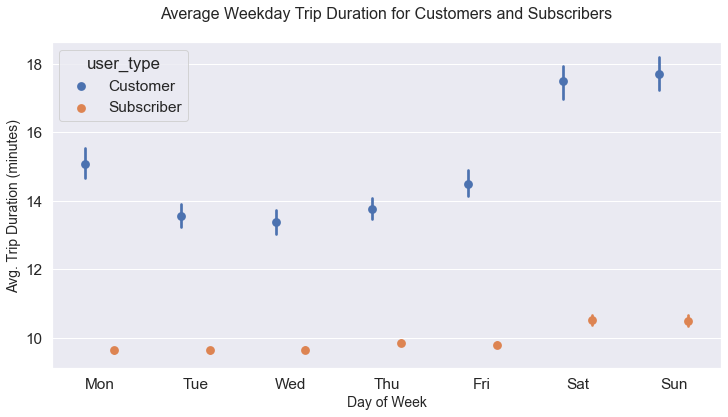

In [70]:
plt.figure(figsize = [12,6]);
sb.pointplot(data=df_clean, x='start_dayofweek', y='duration_mins', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week', fontsize = 14);
plt.ylabel('Avg. Trip Duration (minutes)', fontsize = 14)
plt.title('Average Weekday Trip Duration for Customers and Subscribers\n', fontsize = 16);

According to the above plot, subscribers ride much shorter/quicker trips than casual customers every day of the week. Both user types have a noticeable increase in trip duration on Saturdays and Sundays, especially for casual riders. Subscribers' usage seems more efficient than customers overall and maintained a very consistent average duration Monday through Friday.

Next, I want to know how the hourly usage varies during weekdays for customers and subscribers.

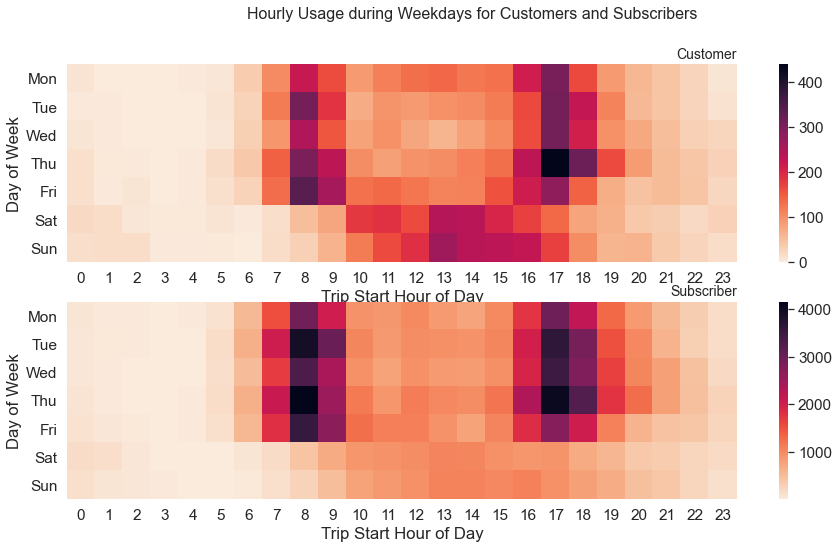

In [68]:
plt.figure(figsize=[15, 8]);
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=16);

plt.subplot(2, 1, 1);
customers = df_clean.query('user_type == "Customer"');
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size();
ct_counts = ct_counts.reset_index(name='count');
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count');
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2);
subscribers = df_clean.query('user_type == "Subscriber"');
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size();
st_counts = st_counts.reset_index(name='count');
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count');
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Day of Week');

plt.show();

It can be seen from the two heatmaps that there are moderate differences in usage patterns/habits between the two types of bike users. While subscribers use bikes mainly on workdays (Mondays - Fridays), customers use the system every day of the week and a lot more on weekends, especially in the afternoon from 1:00 PM to 4:00 PM. On weekdays, both subscribers and casual customers use bikes much more at around 8:00 - 9:00 AM and 5:00 - 6:00 PM as they all bike for the work commute. However, subscribers' usage around these rush hours is far more than casual customers' usage. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.  

Last, I will find out how the average trip duration vary in weekdays based on users' genders.

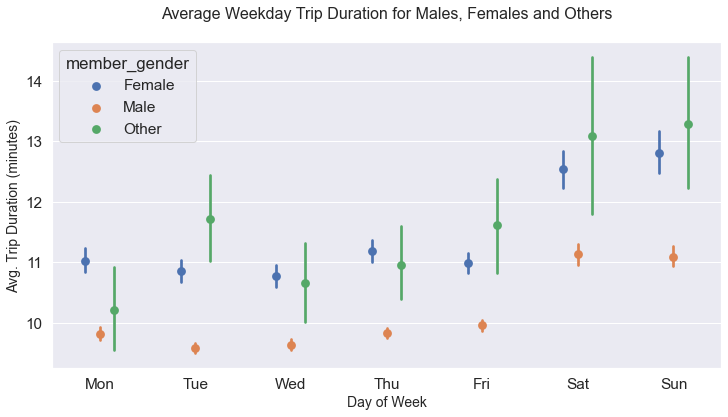

In [71]:
plt.figure(figsize = [12,6]);
sb.pointplot(data=df_clean, x='start_dayofweek', y='duration_mins', hue='member_gender', dodge=0.3, linestyles="");
plt.xlabel('Day of Week', fontsize = 14);
plt.ylabel('Avg. Trip Duration (minutes)', fontsize = 14);
plt.title('Average Weekday Trip Duration for Males, Females and Others\n',  fontsize = 16);

The plot shows that male users ride faster than females for the whole week. Not only faster, but male riders are also more consistent in the time of biking than females and others during Monday and Friday. The average trip duration of all member genders increases dramatically and varies more on weekends (i.e., Saturdays and Sundays) compared to other weekdays. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthens the patterns in the previous bivariate and univariate explorations. Relationships between multiple variables plotted are visualized together, and information is summarized together. It is not surprising that subscribers are most active with short/quick trips during rush hours between Monday and Friday, as it is primarily for commutes to and from work. Meanwhile, casual customers seem to take full advantage of the bike-sharing system quite differently than the subscribers, using it more at the weekend afternoons, probably for sightseeing or leisure purposes.
From the member gender perspective, it makes sense that male riders bike faster and their trip lengths are more consistent and efficient than female riders.



### Were there any interesting or surprising interactions between features?
Interactions between features are complementary and make sense when viewed together; there is no big surprise. Howver, it is not apparent how males and females use the bike system differently in terms of hour of day and day of week, which could be due to the imbalanced number of female riders' records in comparison to male records. Therefore, adding more data on females would provide an insight into how each gender uses the system differently.